In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

In [2]:
#Define the URL for the data to download and the filename as well as the local directory where to be saved.  
DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="./"
local_file = os.path.join(local_dir,file)

In [3]:
#Simple instructions to download the catalog, it checks it don't exist...
#It can take a while so don't desperate.

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))

./DR14Q_v4_4.fits already exist


In [5]:
catalog=Table.read('DR14Q_v4_4.fits')
#catalog.colnames

In [ ]:
#catalog

In [6]:
#select objects with THING_ID>0. Also select the qso's within the zmin, zmax redshift interval, defined so that
#we capture many lyman alpha quasars 
w=(catalog['THING_ID']>0) & (catalog['Z']>2) & (catalog['Z']<4) & (catalog['RA']!=catalog['DEC'])& (catalog['RA']>0) & (catalog['DEC']>0)
reduced_cat=catalog[w]
#reduced_cat

In [7]:
#Group the catalog by PLATE and select only first N objects you want to use... 
#Note I've used only 50 here but the idea would be to download many more... 
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:100]
#small_cat

Text(0,0.5,'DEC')

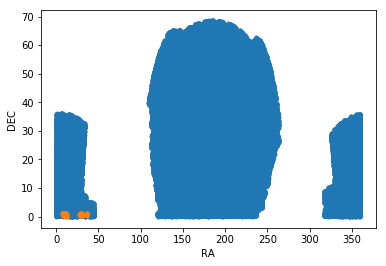

In [8]:
#Lets plot the distribution in RA/DEC of the full catalog, and the small catalog
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='.')
plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [9]:
thing_id=small_cat['THING_ID']
fiberid=small_cat['FIBERID']
plate=small_cat['PLATE']
zqso=small_cat['Z']

In [10]:
#GET THE UNIQUE PLATES WE NEED TO DOWNLOAD FOR THE SELECTION ABOVE AND CONSTRUCT THE FILE NAMES WE NEED. 
plate_list=[]
for p,m in zip(small_cat['PLATE'],small_cat['MJD']):
    plate_list.append(str(p)+'/spPlate-'+str(p)+'-'+str(m)+'.fits')
plate_list=np.unique(plate_list)
#plate_list

In [11]:
plate_list[0:1]

array(['3586/spPlate-3586-55181.fits'], dtype='<U28')

In [12]:
#Takes some minutes... we will have this data on a 
plates_url='https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/'
plates_local='./spPlates/'

if not os.path.exists(plates_local):
        os.makedirs(plates_local)

#for plate_ in plate_list:
for plate_ in plate_list[0:1]:
    url_file = os.path.join(plates_url,plate_)
    local_file=plates_local+plate_.split("/")[1]
    if not os.path.exists(local_file):
        print("downloading spplate from %s to %s"
              % (url_file, local_file))
        tmp = urllib.request.urlretrieve(url_file, local_file)
    else:
        print('%s  %s present on disk. '%(url_file,local_file))

https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3586/spPlate-3586-55181.fits  ./spPlates/spPlate-3586-55181.fits present on disk. 
